In [2]:
%pip install scipy
%pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
game_df = pd.read_csv("csv_files/games-with-all-stats.csv")
game_df.head()

,year,TEAM 1 Name,TEAM 1 (Team) 538 Power Rating,TEAM 1 (Team) 538 Power Rank,TEAM 1 (Team) K TEMPO RANK,TEAM 1 (Team) KADJ T RANK,TEAM 1 (Team) KO RANK,TEAM 1 (Team) KADJ O RANK,TEAM 1 (Team) KD RANK,TEAM 1 (Team) KADJ D RANK,...,TEAM 2 (Conference) EFF HGT,TEAM 2 (Conference) EXP,TEAM 2 (Conference) TALENT,TEAM 2 (Conference) FT%,TEAM 2 (Conference) OP FT%,TEAM 2 (Conference) PPPO,TEAM 2 (Conference) PPPD,TEAM 2 (Conference) ELITE SOS,TEAM 2 (Conference) WAB,Margin of Victory/Defeat
0,2023,Alabama,92.6,16.0,12,4,32,19,5,3,...,79.379,1.827,1.583,71.7,71.7,1.027,1.086,10.569,-13.1,21
1,2023,Maryland,84.5,180.0,335,312,56,35,60,33,...,80.522,2.140,55.266,72.5,71.7,1.059,0.978,34.920,2.9,2
2,2023,College of Charleston,79.8,329.0,44,29,17,70,14,74,...,79.813,2.175,23.515,74.1,74.2,1.058,1.018,23.231,-3.0,-6
3,2023,Virginia,83.8,205.0,360,360,70,74,38,25,...,79.761,1.913,8.005,72.2,72.1,1.048,1.060,11.283,-11.0,-1
4,2023,North Carolina St.,81.4,291.0,89,89,28,37,128,85,...,80.679,1.935,54.668,73.5,72.7,1.065,1.019,30.790,-1.0,-9


In [5]:
# Y axis remains the same
y_axis = "Margin of Victory/Defeat"
score_differential = game_df[y_axis].to_list()



In [6]:
from Team import Team
from LinearRegression import get_line_of_best_fit

# Keep track of r_squareds and fields
r_squared_list = list()

for field in Team.STATS_538_FIELDS:
    diff_x = (game_df["TEAM 1 " + field] - game_df["TEAM 2 " + field]).to_list()
    x_axis = field.replace("(Team) ","") + " Difference"
    slope, y_intercept, r_squared = get_line_of_best_fit(diff_x, score_differential, x_axis)
    
    r_squared_list.append((r_squared, field))
    


    

<Figure size 640x480 with 0 Axes>

In [7]:
for field in Team.KENPOM_FIELDS:
    diff_x = (game_df["TEAM 1 " + field] - game_df["TEAM 2 " + field]).to_list()
    x_axis = field.replace("(Team) ","") + " Difference"
    slope, y_intercept, r_squared = get_line_of_best_fit(diff_x, score_differential, x_axis)
    
    r_squared_list.append((r_squared, field))



<Figure size 640x480 with 0 Axes>

In [8]:
for field in Team.HISTORIC_TEAM_FIELDS:
    diff_x = (game_df["TEAM 1 " + field] - game_df["TEAM 2 " + field]).to_list()
    x_axis = field.replace("(Historic Team) ","") + " Difference"
    slope, y_intercept, r_squared = get_line_of_best_fit(diff_x, score_differential, x_axis)
    
    r_squared_list.append((r_squared, field))

<Figure size 640x480 with 0 Axes>

In [9]:
for field in Team.SHOOTING_SPLITS_FIELDS:
    diff_x = (game_df["TEAM 1 " + field] - game_df["TEAM 2 " + field]).to_list()
    x_axis = field.replace("(Shooting Splits) ","") + " Difference"
    slope, y_intercept, r_squared = get_line_of_best_fit(diff_x, score_differential, x_axis)
    
    r_squared_list.append((r_squared, field))



<Figure size 640x480 with 0 Axes>

In [10]:
for field in Team.RESUME_FIELDS:
    diff_x = (game_df["TEAM 1 " + field] - game_df["TEAM 2 " + field]).to_list()
    x_axis = field.replace("(Resumes) ","") + " Difference"
    slope, y_intercept, r_squared = get_line_of_best_fit(diff_x, score_differential, x_axis)
    
    r_squared_list.append((r_squared, field))



<Figure size 640x480 with 0 Axes>

In [11]:
from Conference import Conference

for field in Conference.CONFERENCE_FIELDS:
    diff_x = (game_df["TEAM 1 " + field] - game_df["TEAM 2 " + field]).to_list()
    x_axis = field.replace("(Conference) ","Conf ") + " Difference"
    slope, y_intercept, r_squared = get_line_of_best_fit(diff_x, score_differential, x_axis)
    
    r_squared_list.append((r_squared, field))

<Figure size 640x480 with 0 Axes>

In [12]:
from Seed import Seed

for field in Seed.SEED_FIELDS:
    diff_x = (game_df["TEAM 1 " + field] - game_df["TEAM 2 " + field]).to_list()
    x_axis = field.replace("(Seed) ","Seed ") + " Difference"
    slope, y_intercept, r_squared = get_line_of_best_fit(diff_x, score_differential, x_axis)
    
    r_squared_list.append((r_squared, field))

<Figure size 640x480 with 0 Axes>

In [13]:
# Sort r_squared list 
sorted_rsquared_list = sorted(r_squared_list, key=lambda x: x[0], reverse=True)

sorted_rsquared_list[:10], sorted_rsquared_list[10:20]

([(np.float64(0.37187643701041107), '(Team) 538 Power Rating'),
  (np.float64(0.3515500462601976), '(Team) BARTHAG RANK'),
  (np.float64(0.3507290123760937), '(Team) BADJ EM RANK'),
  (np.float64(0.35072858724847716), '(Team) 538 Power Rank'),
  (np.float64(0.3474654573109288), '(Historic Team) 538 Rating median'),
  (np.float64(0.344309832611632), '(Historic Team) 538 Rating mean'),
  (np.float64(0.34183649931840004), '(Resumes) B POWER'),
  (np.float64(0.33716620178488593), '(Team) KADJ EM RANK'),
  (np.float64(0.33237068564384664), '(Seed) 538 Mean'),
  (np.float64(0.33129068084811963), '(Seed) 538 Median')],
 [(np.float64(0.2999297772629165), '(Resumes) WAB RANK'),
  (np.float64(0.29768466577223807), '(Resumes) NET RPI'),
  (np.float64(0.29584144293953374), '(Resumes) ELO'),
  (np.float64(0.2946413942020401), '(Team) BADJ O RANK'),
  (np.float64(0.292424258581393), '(Resumes) RESUME'),
  (np.float64(0.2811269911273579), '(Team) KADJ O RANK'),
  (np.float64(0.2724365624013491), '(Co

In [80]:
"""
Since some of these stats are not present for all the years in the data accumulated, I will take the top 15 stats based on how well they correlate.

These top 15 stats must be present for all rows 
"""

# Retrieve columns from csv that contains all 944 rows with a subset of the columns

import pickle


games_no_nan_df = pd.read_csv("csv_files/all-games-with-annual-stats.csv")
columns_no_nan = games_no_nan_df.columns.to_list()

top15_list = list()

for r_2, stat in sorted_rsquared_list:
    team1_stat = "TEAM 1 " + stat
    team2_stat = "TEAM 2 " + stat
    if team1_stat in columns_no_nan and team2_stat in columns_no_nan:
        top15_list.append(team1_stat)
        top15_list.append(team2_stat)
    
        if len(top15_list) == 30: # 15 for each stat
            break

print(top15_list)

with open('TOP_STATS_LIST.pkl', 'wb') as file:
    pickle.dump(top15_list, file)




['TEAM 1 (Team) BARTHAG RANK', 'TEAM 2 (Team) BARTHAG RANK', 'TEAM 1 (Team) BADJ EM RANK', 'TEAM 2 (Team) BADJ EM RANK', 'TEAM 1 (Resumes) B POWER', 'TEAM 2 (Resumes) B POWER', 'TEAM 1 (Team) KADJ EM RANK', 'TEAM 2 (Team) KADJ EM RANK', 'TEAM 1 (Seed) 538 Mean', 'TEAM 2 (Seed) 538 Mean', 'TEAM 1 (Seed) 538 Median', 'TEAM 2 (Seed) 538 Median', 'TEAM 1 (Resumes) WAB RANK', 'TEAM 2 (Resumes) WAB RANK', 'TEAM 1 (Resumes) NET RPI', 'TEAM 2 (Resumes) NET RPI', 'TEAM 1 (Resumes) ELO', 'TEAM 2 (Resumes) ELO', 'TEAM 1 (Team) BADJ O RANK', 'TEAM 2 (Team) BADJ O RANK', 'TEAM 1 (Resumes) RESUME', 'TEAM 2 (Resumes) RESUME', 'TEAM 1 (Team) KADJ O RANK', 'TEAM 2 (Team) KADJ O RANK', 'TEAM 1 (Team) ELITE SOS RANK', 'TEAM 2 (Team) ELITE SOS RANK', 'TEAM 1 (Resumes) R SCORE', 'TEAM 2 (Resumes) R SCORE', 'TEAM 1 (Resumes) Q3 Q4 L', 'TEAM 2 (Resumes) Q3 Q4 L']


In [15]:
#Include the margin of victory column
top15_list.append("Margin of Victory/Defeat")
games_subset = games_no_nan_df[top15_list]

In [16]:
games_subset.head(10)

,TEAM 1 (Team) BARTHAG RANK,TEAM 2 (Team) BARTHAG RANK,TEAM 1 (Team) BADJ EM RANK,TEAM 2 (Team) BADJ EM RANK,TEAM 1 (Resumes) B POWER,TEAM 2 (Resumes) B POWER,TEAM 1 (Team) KADJ EM RANK,TEAM 2 (Team) KADJ EM RANK,TEAM 1 (Seed) 538 Mean,TEAM 2 (Seed) 538 Mean,...,TEAM 2 (Resumes) RESUME,TEAM 1 (Team) KADJ O RANK,TEAM 2 (Team) KADJ O RANK,TEAM 1 (Team) ELITE SOS RANK,TEAM 2 (Team) ELITE SOS RANK,TEAM 1 (Resumes) R SCORE,TEAM 2 (Resumes) R SCORE,TEAM 1 (Resumes) Q3 Q4 L,TEAM 2 (Resumes) Q3 Q4 L,Margin of Victory/Defeat
0,2,193,2,194,2.7,193.0,3,170,92.476,69.771,...,241,19,137,10,323,99.9,0.0,0,7,21
1,32,18,32,18,22.0,20.3,22,17,83.293,82.929,...,25,35,15,39,5,85.9,93.3,0,0,2
2,74,12,70,14,69.3,22.0,73,14,79.945,86.415,...,26,70,64,336,65,9.5,98.6,2,0,-6
3,27,95,29,95,28.3,87.0,34,89,87.245,77.979,...,150,74,33,69,295,99.2,0.0,1,5,-1
4,42,14,40,15,48.7,11.7,55,13,81.800,85.543,...,40,37,28,75,14,55.5,97.9,0,1,-9
5,120,15,119,13,110.7,13.3,102,15,75.993,87.415,...,4,71,2,289,3,0.0,99.8,6,0,-18
6,59,28,54,24,54.0,32.7,51,18,83.679,82.814,...,60,10,13,50,87,93.4,68.6,0,2,11
7,106,7,107,7,116.3,9.3,112,10,73.693,90.400,...,7,103,4,278,35,0.0,99.8,5,0,4
8,6,307,4,316,7.0,303.0,7,312,92.476,69.771,...,329,7,155,23,362,99.9,0.0,0,14,-5
9,16,25,18,25,27.3,34.0,19,26,83.293,82.929,...,59,26,32,58,138,96.5,96.0,1,0,-1


In [17]:
# Separate features from output. If margin of victory is positive, let it equal to 1
games_subset['Win?'] = (games_subset['Margin of Victory/Defeat'] >= 0).astype(int)

games_subset = games_subset.drop('Margin of Victory/Defeat', axis=1)  # Drop Margin

X = games_subset.drop('Win?', axis=1)  # Drop Win since it is the target
y = games_subset['Win?']  

print(len(X), len(y))


944 944


/var/folders/jf/v_c5gyzs0tx2hzj7stqw6bs80000gn/T/ipykernel_95513/3933445346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_subset['Win?'] = (games_subset['Margin of Victory/Defeat'] >= 0).astype(int)


In [18]:
%pip install scikit-learn
%pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




755 189


In [82]:
# Scale

scaler = MinMaxScaler()
scaled_Xtrain = scaler.fit_transform(X_train)
scaled_Xtest = scaler.transform(X_test)



print(len(scaled_Xtrain),len(scaled_Xtest))

with open('MinMaxScaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

755 189


In [29]:
import tensorflow.keras as keras
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Create model
model = keras.models.Sequential()

# Add Layers (Will add 2 hidden layers before output)
model.add(keras.layers.Dense(64, input_dim=scaled_Xtrain.shape[1], activation='relu'))  
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(16, activation='relu'))  
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(1, activation='sigmoid')) 


model.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=["accuracy","precision","recall"])

# Fit the model
model.fit(scaled_Xtrain, y_train, epochs=10, batch_size=16, validation_split=0.1)

# Save model weights
model.save('saved-models/model-3.h5')

# Evaluate the model on the test set
evaluation_dict = model.evaluate(scaled_Xtest, y_test, return_dict=True)

print(evaluation_dict)

# Get probabilites for ROC Curve
test_probabilities = model.predict(scaled_Xtest)  # Get probabilities




/Users/srikharpadmanabhan/.pyenv/versions/3.10.15/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5280 - loss: 0.6906 - precision: 0.5166 - recall: 0.8125 - val_accuracy: 0.7368 - val_loss: 0.6081 - val_precision: 0.7692 - val_recall: 0.7317
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 0.6155 - precision: 0.6568 - recall: 0.7241 - val_accuracy: 0.7763 - val_loss: 0.5341 - val_precision: 0.8158 - val_recall: 0.7561
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6443 - loss: 0.6290 - precision: 0.6204 - recall: 0.6369 - val_accuracy: 0.7763 - val_loss: 0.5088 - val_precision: 0.7857 - val_recall: 0.8049
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6464 - loss: 0.6049 - precision: 0.6309 - recall: 0.6322 - val_accuracy: 0.8026 - val_loss: 0.4985 - val_precision: 0.8250 - val_recall: 0.8049
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - loss: 0.5941 - precision: 0.6757 - recall: 0.7414 - val_accuracy: 0.7368 - val_loss: 0.4996 - val

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6623 - loss: 0.5813 - precision: 0.5798 - recall: 0.6937 
{'accuracy': 0.6984127163887024, 'loss': 0.5721501708030701, 'precision': 0.6404494643211365, 'recall': 0.6951219439506531}
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [90]:
%pip install seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(y_true_vals, y_prob_vals, model_name, threshold=0.5):
    
    #Convert to predictions
    y_pred_vals = (y_prob_vals > threshold).astype(int)
    
    cm = confusion_matrix(y_true_vals, y_pred_vals)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Loss", "Win"], yticklabels=["Loss", "Win"])
    plt.xlabel('Model Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for using (threshold={threshold})')
    plt.savefig(f'confusion_matrices/Confusion Matrix for Model ({model_name}) using (threshold={threshold}).png')
    
    
    
    
    


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


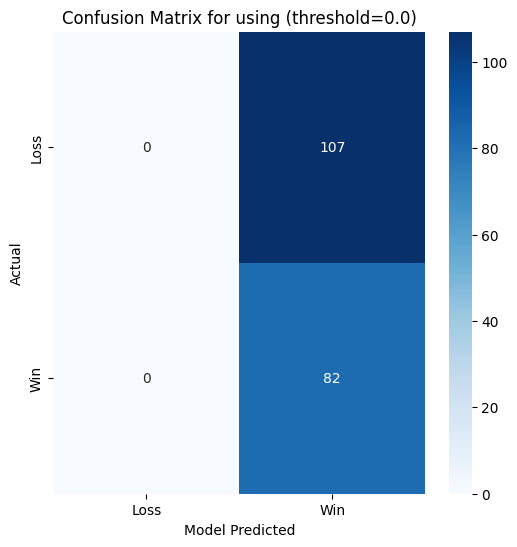

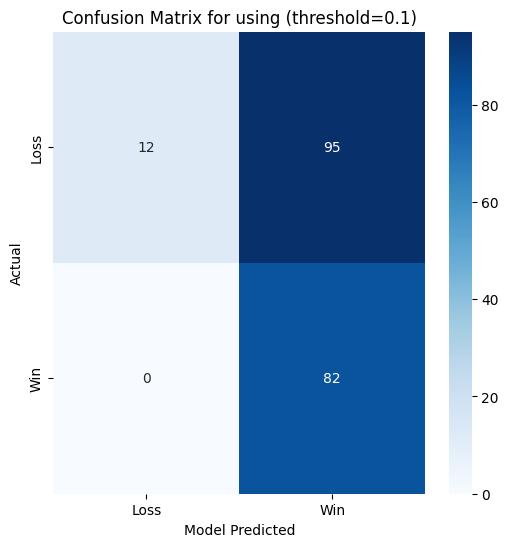

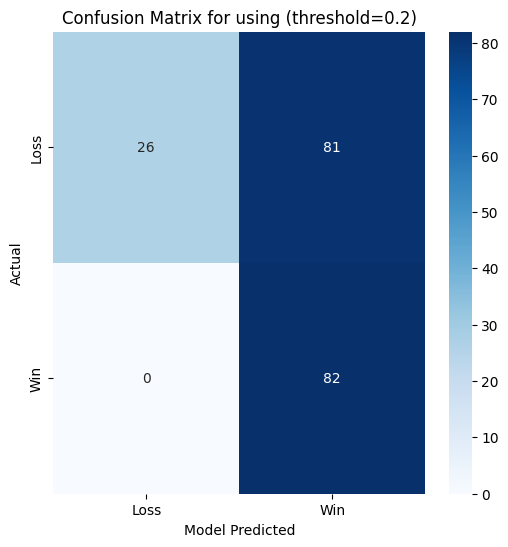

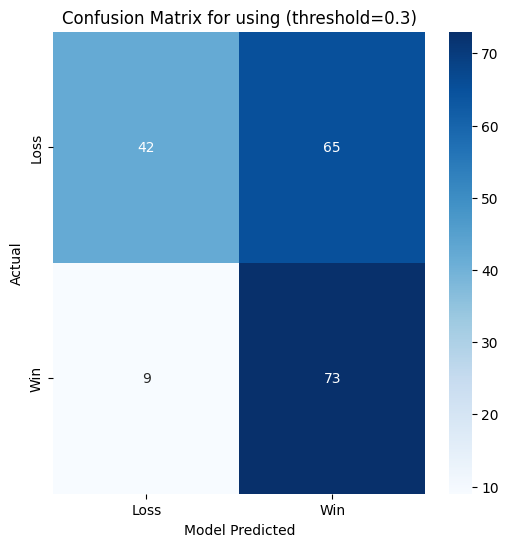

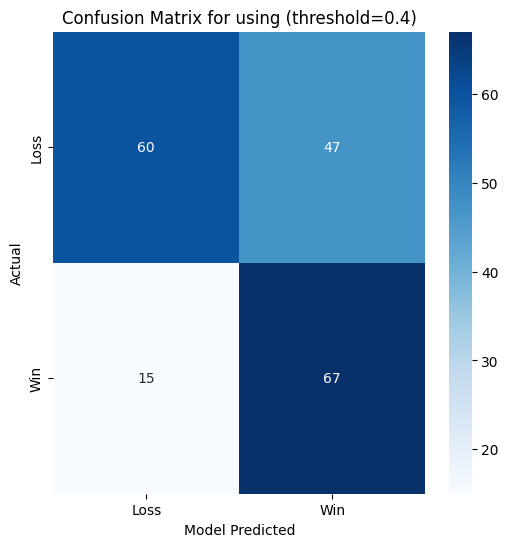

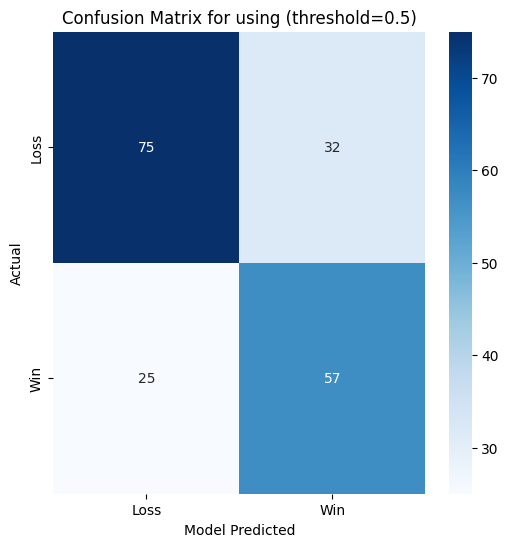

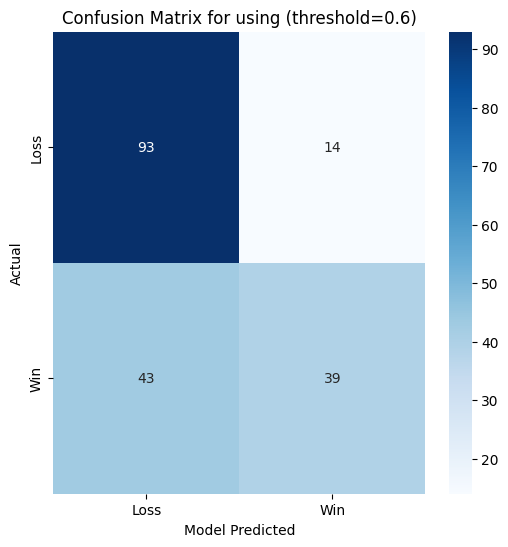

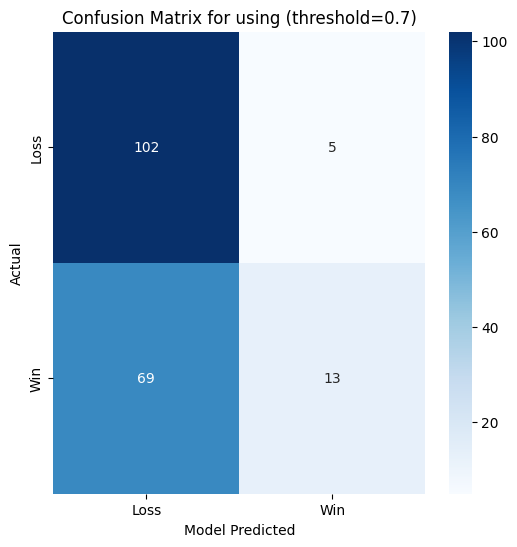

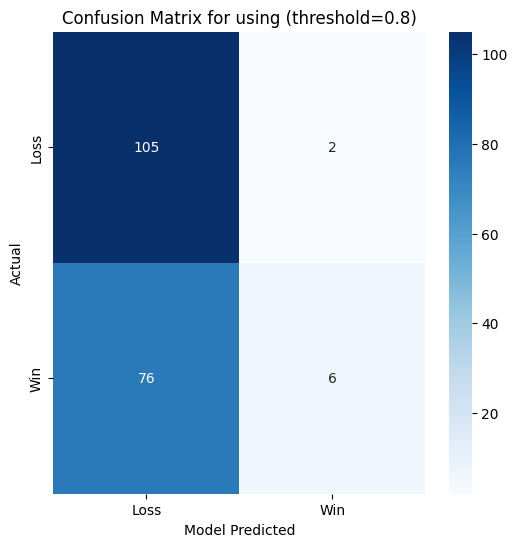

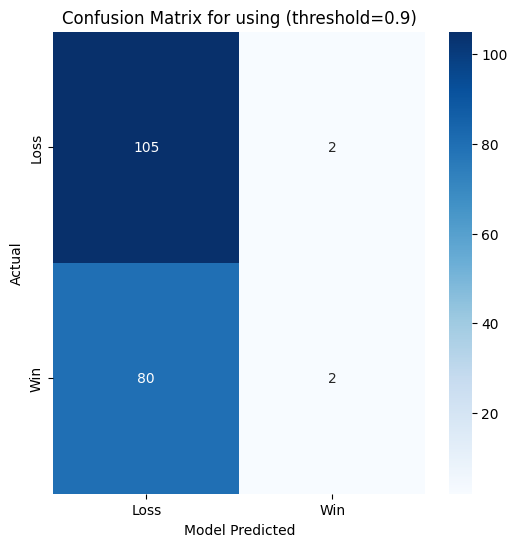

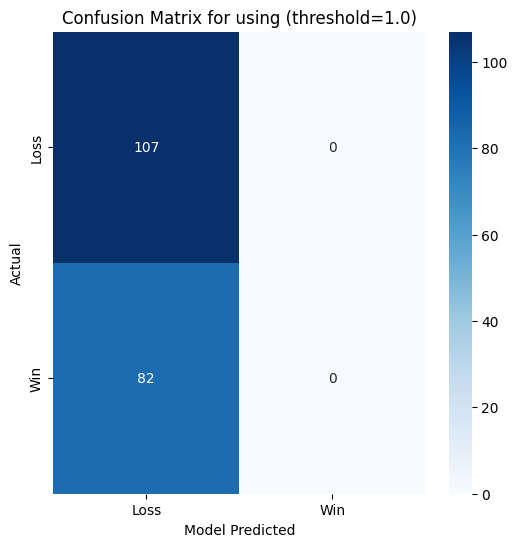

In [91]:
#Generate confusion matrices for each threshold
for num in range(0,11):
    generate_confusion_matrix(y_test, test_probabilities, model_name="3", threshold=num/10)

In [79]:
# Get AUC Score
auc_score = roc_auc_score(y_test, test_probabilities)

# Optionally, plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)  # fpr: False positive rate, tpr: True positive rate

plt.plot(fpr, tpr, label=f"ROC Curve: AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='g', label='Random')

# Fill between random
plt.fill_between(fpr, tpr, [x for x in fpr], color="pink")
plt.xlabel('False Positive Rate (FPR')
plt.ylabel('True Positive Rate (TPR')
plt.title('ROC Curve for Model 2')
plt.legend()
plt.savefig("ML Charts/ROC Curve for Model 3.png")

plt.clf()

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, test_probabilities)

pr_curve_auc = auc(recall_vals, precision_vals)
# Plot the Precision-Recall curve
plt.plot(recall_vals, precision_vals, label=f'P-R Curve: AUC = {pr_curve_auc}')

# Labeling the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig("ML Charts/P-R Curve for Model 3.png")

plt.clf()

<Figure size 640x480 with 0 Axes>

In [26]:
"""
Now we will create an ML model that predicts the final score, 
then we will check its output and see if it predicts wins and losses better than the previous model
"""

# Get only the top 15 stats from the regression
new_games_subset = games_no_nan_df[top15_list]

# Also create a variable to hold whether the margin is positive or not
linear_y_win = (new_games_subset['Margin of Victory/Defeat'] >= 0).astype(int)

linear_X = new_games_subset.drop('Margin of Victory/Defeat', axis=1)  # Drop Win since it is the target
linear_y = new_games_subset['Margin of Victory/Defeat']  

print(len(linear_X), len(linear_y), len(linear_y_win))

944 944 944


In [30]:
# Split into train and test data
linear_X_train, linear_X_test, linear_y_train, linear_y_test = train_test_split(linear_X, linear_y, test_size=0.2, random_state=0)

scaler_linear = MinMaxScaler()
scaled_Xtrain_linear = scaler_linear.fit_transform(linear_X_train)
scaled_Xtest_linear = scaler_linear.transform(linear_X_test)

print(len(scaled_Xtrain),len(scaled_Xtest))

755 189


In [34]:
linear_model = keras.models.Sequential()

# Lets make it a model that has layers that go down in size to 1
linear_model.add(keras.layers.Dense(64, input_dim=scaled_Xtrain_linear.shape[1], activation='relu'))
linear_model.add(keras.layers.Dense(32, activation='relu'))
linear_model.add(keras.layers.Dense(8, activation='relu'))
linear_model.add(keras.layers.Dense(2, activation='relu'))
linear_model.add(keras.layers.Dense(1))  

# Compile the model
linear_model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
linear_model.summary()

/Users/srikharpadmanabhan/.pyenv/versions/3.10.15/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,349 (16.99 KB)

 Trainable params: 4,349 (16.99 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Fit the model
linear_model.fit(scaled_Xtrain_linear, linear_y_train, epochs=20, batch_size=16, validation_split=0.1)

# Save model weights
linear_model.save('saved-models/model-4-linear.h5')

# Evaluate the model on the test set
evaluation_dict = linear_model.evaluate(scaled_Xtest_linear, linear_y_test, return_dict=True)

print(evaluation_dict)

# Get predictions
linear_predictions = linear_model.predict(scaled_Xtest)  # Get probabilities

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130.8076 - val_loss: 110.5050
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 131.2624 - val_loss: 111.3048
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 140.4083 - val_loss: 110.1877
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 137.0010 - val_loss: 109.7875
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 137.2915 - val_loss: 111.8512
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 135.9642 - val_loss: 117.2769
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133.7288 - val_loss: 109.5833
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 126.5005 - val_loss: 108.3623
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 123.0065 - val_loss: 112.6271
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114.8108 - val_loss: 108.3860
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 128.3553 - val_loss: 107.3604
Epoch 12/20
43/43 ━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.1400
{'loss': 136.65554809570312}
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [63]:
linear_predictions[:5], linear_y_test[:5], len(linear_predictions), len(linear_y_test)

(array([[-1.4881086 ],
        [-5.1507154 ],
        [-0.39429334],
        [-3.3728523 ],
        [-5.5260415 ]], dtype=float32),
 638    -7
 545    30
 688   -13
 14    -10
 261    -8
 Name: Margin of Victory/Defeat, dtype: int64,
 189,
 189)

In [64]:
def get_accuracy_with_margin(predictions, correct_answers):
    correct_prediction = 0
    total = len(predictions)

    for i in range(total):
        if predictions[i] * correct_answers[i] > 0:
            correct_prediction += 1
            
    print(correct_prediction / total)

In [65]:
get_accuracy_with_margin(linear_predictions, list(linear_y_test))

0.6931216931216931


In [77]:
def plot_linear_predictions_residual(predictions, actual):
    residuals = actual - predictions
    
    plt.scatter(actual, residuals, color='b', label='Residuals')
    plt.axhline(y=0, color='red')
    plt.xlabel('True Margins of Victory/Defeat')
    plt.ylabel('Residuals')
    plt.title('Residual Plot for Margins of Victory Predictions')
    plt.legend()
    
    plt.savefig("ML Charts/Residual Plot for Linear Model.png")


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


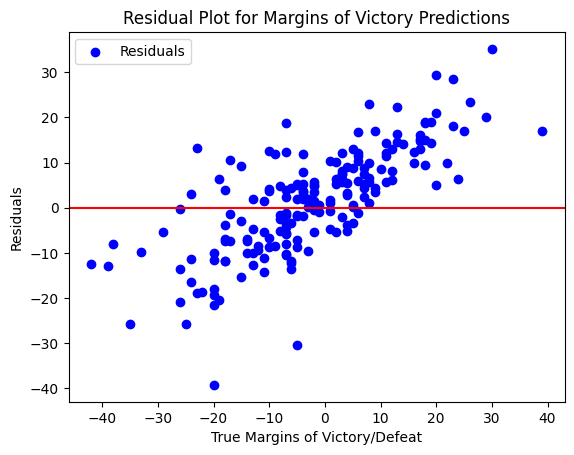

In [78]:
%pip install numpy
import numpy as np

plot_linear_predictions_residual(np.array(list(linear_predictions)).flatten(), np.array(list(linear_y_test)))